In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os

In [33]:
# Set option to display all columns
pd.set_option('display.max_columns', None)
ipl=pd.read_csv("IPL_Matches_2008_2023.csv")
ipl.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,335982,Bangalore,18-04-2008,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen


In [3]:
# Set option to display all columns
pd.set_option('display.max_columns', None)
ipl2=pd.read_csv("Runs_and_wickets_all_matches_2008_2023.csv")
ipl2.head(1)

,ID,Season,Date,Total Runs 1st Innings,Total Runs 2nd Innings,Total Wickets 1st Innings,Total Wickets 2nd Innings,Power Play Runs 1st Innings,Middle Overs Runs 1st Innings,Death Overs Runs 1st Innings,Power Play Runs 2nd Innings,Middle Overs Runs 2nd Innings,Death Overs Runs 2nd Innings,Power Play Wickets 1st Innings,Middle Overs Wickets 1st Innings,Death Overs Wickets 1st Innings,Power Play Wickets 2nd Innings,Middle Overs Wickets 2nd Innings,Death Overs Wickets 2nd Innings
0,335982,2008,18-04-2008,222,82,3,10,68,90,64,33,49,0,1,1,1,4,6,0


In [4]:

# Merge datasets on the 'ID' variable
ipl3 = pd.merge(ipl, ipl2, on='ID', how='outer')

ipl3.head(1) # Print the merged DataFrame to verify the result


,ID,City,Date_x,Season_x,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Season_y,Date_y,Total Runs 1st Innings,Total Runs 2nd Innings,Total Wickets 1st Innings,Total Wickets 2nd Innings,Power Play Runs 1st Innings,Middle Overs Runs 1st Innings,Death Overs Runs 1st Innings,Power Play Runs 2nd Innings,Middle Overs Runs 2nd Innings,Death Overs Runs 2nd Innings,Power Play Wickets 1st Innings,Middle Overs Wickets 1st Innings,Death Overs Wickets 1st Innings,Power Play Wickets 2nd Innings,Middle Overs Wickets 2nd Innings,Death Overs Wickets 2nd Innings
0,335982,Bangalore,18-04-2008,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008,18-04-2008,222,82,3,10,68,90,64,33,49,0,1,1,1,4,6,0


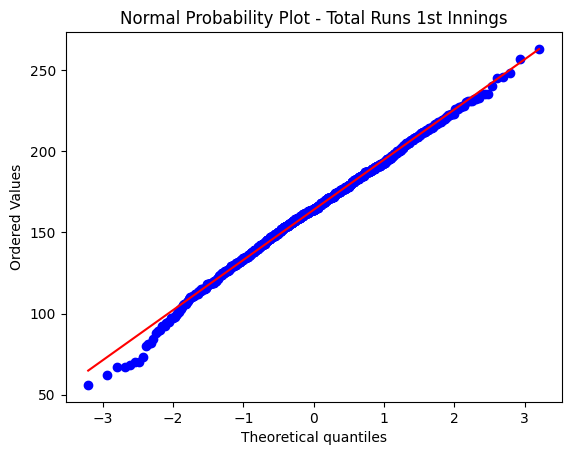

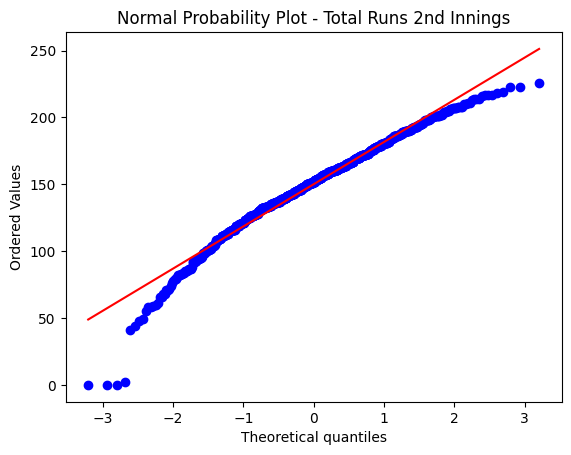

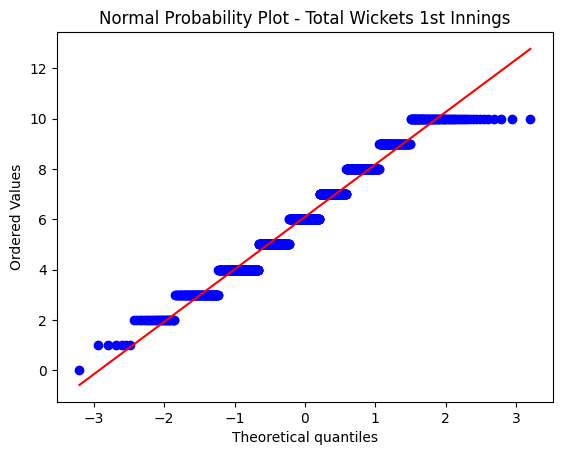

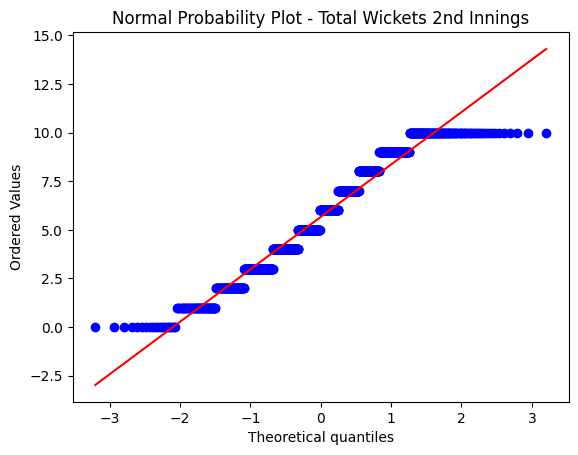

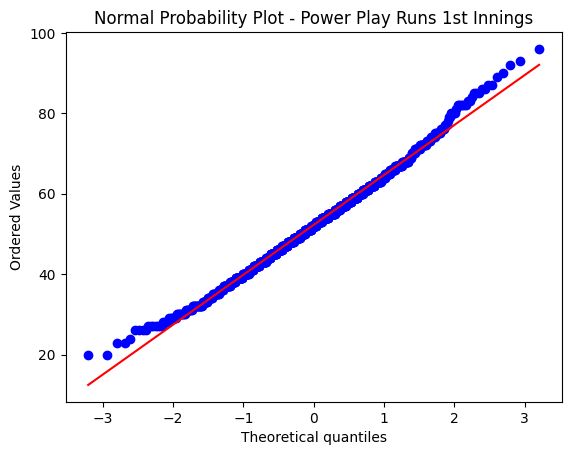

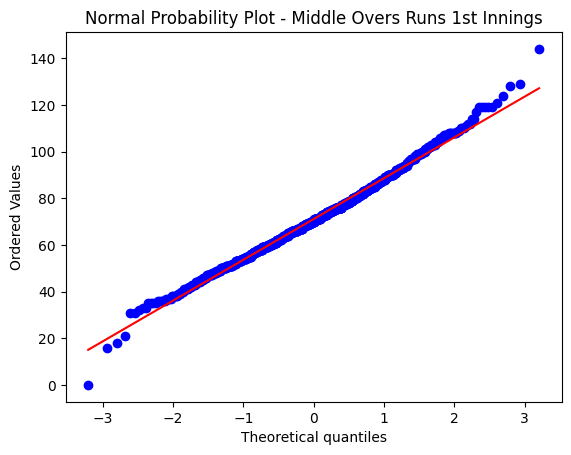

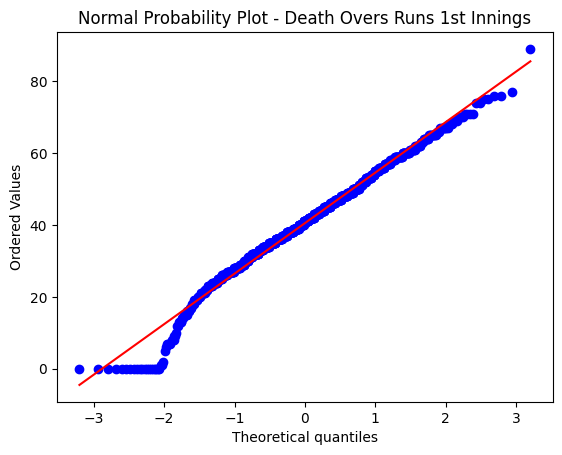

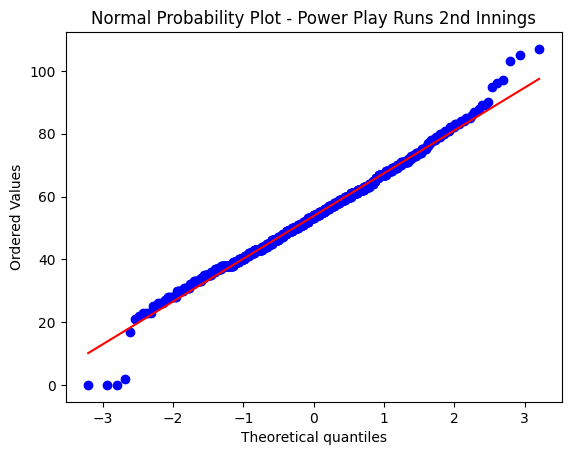

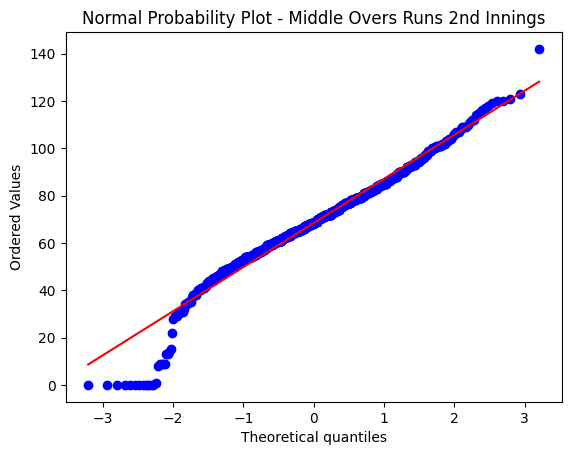

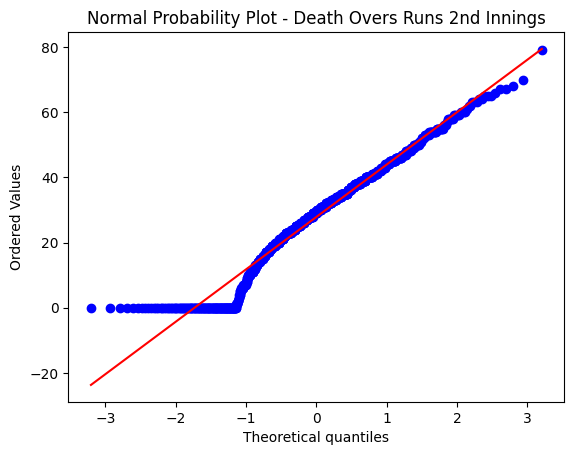

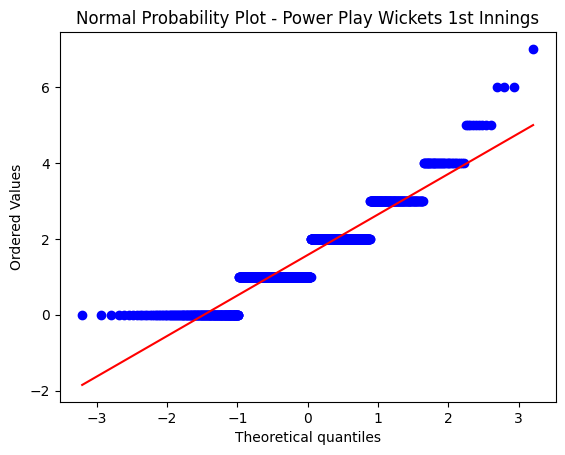

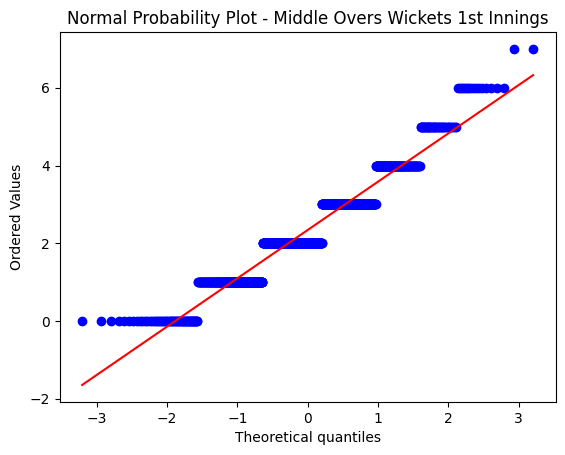

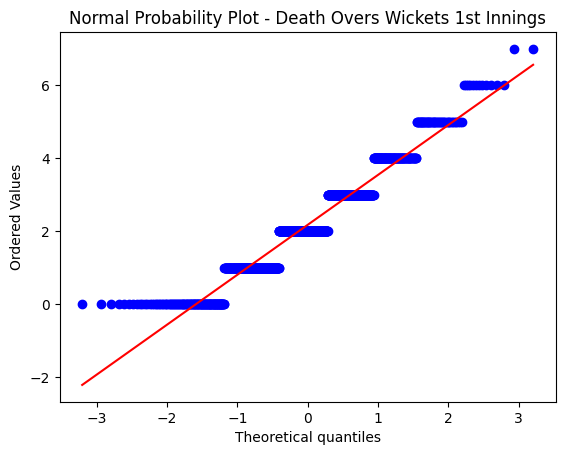

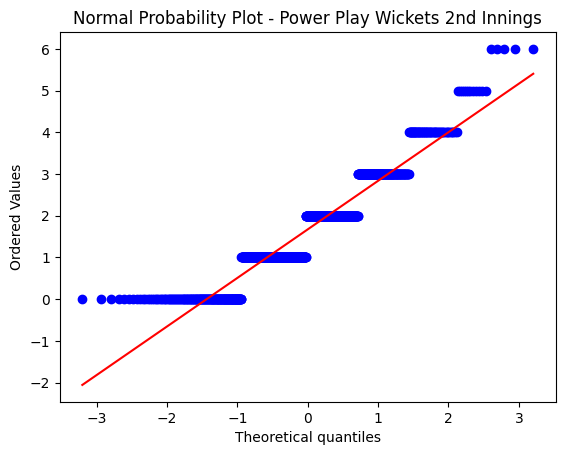

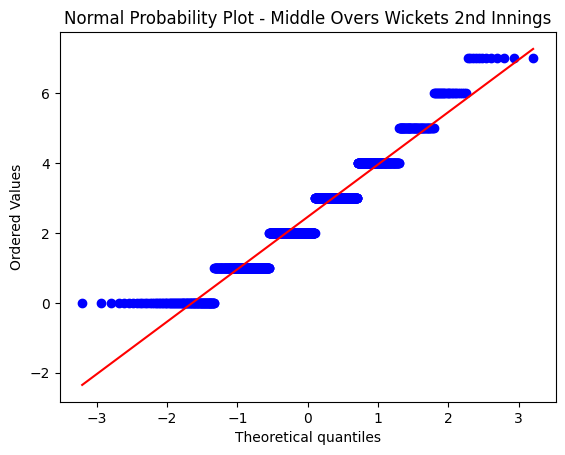

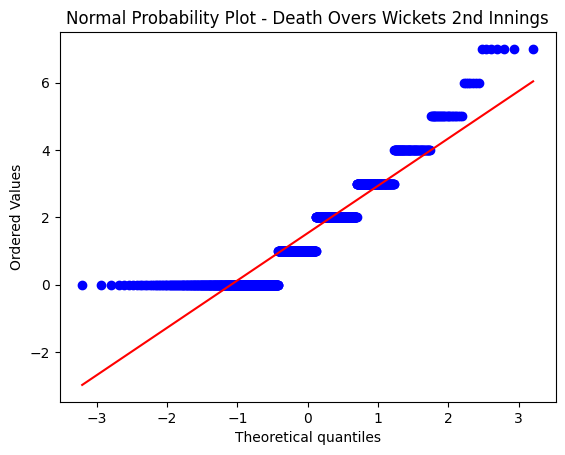

In [5]:
# Selecting the last 16 columns from the dataset
variables = ['Total Runs 1st Innings', 'Total Runs 2nd Innings', 'Total Wickets 1st Innings',
             'Total Wickets 2nd Innings', 'Power Play Runs 1st Innings', 'Middle Overs Runs 1st Innings',
             'Death Overs Runs 1st Innings', 'Power Play Runs 2nd Innings', 'Middle Overs Runs 2nd Innings',
             'Death Overs Runs 2nd Innings', 'Power Play Wickets 1st Innings', 'Middle Overs Wickets 1st Innings',
             'Death Overs Wickets 1st Innings', 'Power Play Wickets 2nd Innings', 'Middle Overs Wickets 2nd Innings',
             'Death Overs Wickets 2nd Innings']

# Create normal probability plots for each variable
for variable in variables:
    plt.figure()
    stats.probplot(ipl3[variable], dist="norm", plot=plt)
    plt.title(f'Normal Probability Plot - {variable}')
    plt.show()

In [6]:
#last_16_columns = ipl3.iloc[:, -16:]

# Create the pair plot
#sns.pairplot(last_16_columns)
#plt.suptitle('Pair Plot of Last 16 Columns', y=1.02)
#plt.show()

In [7]:
ipl3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   ID                                1024 non-null   int64 
 1   City                              1024 non-null   object
 2   Date_x                            1024 non-null   object
 3   Season_x                          1024 non-null   int64 
 4   MatchNumber                       1024 non-null   int64 
 5   Team1                             1024 non-null   object
 6   Team2                             1024 non-null   object
 7   Venue                             1024 non-null   object
 8   TossWinner                        1024 non-null   object
 9   TossDecision                      1024 non-null   object
 10  SuperOver                         1024 non-null   object
 11  WinningTeam                       1024 non-null   object
 12  WonBy               

In [8]:
# Drop the specified variables
ipl3 = ipl3.drop(columns=['Team1Players', 'Team2Players', 'method', 'Season_y', 'Date_y', 'SuperOver'])

ipl3.head(1)  # Print the DataFrame to verify the changes


,ID,City,Date_x,Season_x,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,WonBy,Margin,Player_of_Match,Umpire1,Umpire2,Total Runs 1st Innings,Total Runs 2nd Innings,Total Wickets 1st Innings,Total Wickets 2nd Innings,Power Play Runs 1st Innings,Middle Overs Runs 1st Innings,Death Overs Runs 1st Innings,Power Play Runs 2nd Innings,Middle Overs Runs 2nd Innings,Death Overs Runs 2nd Innings,Power Play Wickets 1st Innings,Middle Overs Wickets 1st Innings,Death Overs Wickets 1st Innings,Power Play Wickets 2nd Innings,Middle Overs Wickets 2nd Innings,Death Overs Wickets 2nd Innings
0,335982,Bangalore,18-04-2008,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,Runs,140,BB McCullum,Asad Rauf,RE Koertzen,222,82,3,10,68,90,64,33,49,0,1,1,1,4,6,0


In [9]:
# Get the current working directory
#current_directory = os.getcwd()

# Define the file name
#file_name = "2008-2023 IPL ANALYSIS.csv"

# Save the DataFrame to a CSV file in the current directory
#ipl3.to_csv(os.path.join(current_directory, file_name), index=False)

# Now, the DataFrame 'merged_data2_sorted' is saved as a CSV file in the current working directory


In [10]:
ipl3.columns

Index(['ID', 'City', 'Date_x', 'Season_x', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'WinningTeam', 'WonBy', 'Margin',
       'Player_of_Match', 'Umpire1', 'Umpire2', 'Total Runs 1st Innings',
       'Total Runs 2nd Innings', 'Total Wickets 1st Innings',
       'Total Wickets 2nd Innings', 'Power Play Runs 1st Innings',
       'Middle Overs Runs 1st Innings', 'Death Overs Runs 1st Innings',
       'Power Play Runs 2nd Innings', 'Middle Overs Runs 2nd Innings',
       'Death Overs Runs 2nd Innings', 'Power Play Wickets 1st Innings',
       'Middle Overs Wickets 1st Innings', 'Death Overs Wickets 1st Innings',
       'Power Play Wickets 2nd Innings', 'Middle Overs Wickets 2nd Innings',
       'Death Overs Wickets 2nd Innings'],
      dtype='object')

In [11]:
ipl['Team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Delhi Capitals',
       'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans'],
      dtype=object)

In [12]:
last_16_columns = ipl3.iloc[:, -16:]
descriptive_stats = last_16_columns.describe()
descriptive_stats

,Total Runs 1st Innings,Total Runs 2nd Innings,Total Wickets 1st Innings,Total Wickets 2nd Innings,Power Play Runs 1st Innings,Middle Overs Runs 1st Innings,Death Overs Runs 1st Innings,Power Play Runs 2nd Innings,Middle Overs Runs 2nd Innings,Death Overs Runs 2nd Innings,Power Play Wickets 1st Innings,Middle Overs Wickets 1st Innings,Death Overs Wickets 1st Innings,Power Play Wickets 2nd Innings,Middle Overs Wickets 2nd Innings,Death Overs Wickets 2nd Innings
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,163.878906,150.083984,6.093750,5.664062,52.253906,71.099609,40.525391,53.794922,68.416992,27.872070,1.574219,2.339844,2.179688,1.673828,2.459961,1.530273
std,30.899468,31.967187,2.111043,2.749645,12.425181,17.516529,14.118107,13.664995,18.921946,16.316225,1.123968,1.283680,1.409692,1.216962,1.541970,1.505630
min,56.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,144.000000,133.000000,4.000000,4.000000,44.000000,59.000000,32.000000,44.000000,58.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,164.000000,152.000000,6.000000,6.000000,52.000000,70.000000,41.000000,53.000000,69.000000,29.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,185.000000,171.000000,8.000000,8.000000,60.000000,82.000000,49.000000,62.000000,79.250000,39.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000
max,263.000000,226.000000,10.000000,10.000000,96.000000,144.000000,89.000000,107.000000,142.000000,79.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000


In [18]:
# Create a dictionary mapping team names to their short forms
team_name_mapping = {
    'Delhi Daredevils': 'DC',
    'Pune Warriors': 'PW',
    'Rajasthan Royals': 'RR',
    'Gujarat Lions': 'GL',
    'Delhi Capitals': 'DC',
    'Kings XI Punjab': 'PK',
    'Lucknow Super Giants': 'LSG',
    'Chennai Super Kings': 'CSK',
    'Gujarat Titans': 'GT',
    'Kolkata Knight Riders': 'KKR',
    'Punjab Kings': 'PK',
    'Rising Pune Supergiants': 'RPS',
    'Mumbai Indians': 'MI',
    'Deccan Chargers': 'SRH',
    'Sunrisers Hyderabad': 'SRH',
    'Royal Challengers Bangalore': 'RCB',
    'Kochi Tuskers Kerala': 'KTK'
}

# Replace team names with their short forms in the DataFrame
ipl3['Team1'] = ipl3['Team1'].replace(team_name_mapping)
ipl3['Team2'] = ipl3['Team2'].replace(team_name_mapping)
ipl3['WinningTeam'] = ipl3['WinningTeam'].replace(team_name_mapping)
ipl3['TossWinner'] = ipl3['TossWinner'].replace(team_name_mapping)

# Display the updated DataFrame
ipl3

,ID,City,Date_x,Season_x,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,WonBy,Margin,Player_of_Match,Umpire1,Umpire2,Total Runs 1st Innings,Total Runs 2nd Innings,Total Wickets 1st Innings,Total Wickets 2nd Innings,Power Play Runs 1st Innings,Middle Overs Runs 1st Innings,Death Overs Runs 1st Innings,Power Play Runs 2nd Innings,Middle Overs Runs 2nd Innings,Death Overs Runs 2nd Innings,Power Play Wickets 1st Innings,Middle Overs Wickets 1st Innings,Death Overs Wickets 1st Innings,Power Play Wickets 2nd Innings,Middle Overs Wickets 2nd Innings,Death Overs Wickets 2nd Innings
0,335982,Bangalore,18-04-2008,2008,1,RCB,KKR,M Chinnaswamy Stadium,RCB,field,KKR,Runs,140,BB McCullum,Asad Rauf,RE Koertzen,222,82,3,10,68,90,64,33,49,0,1,1,1,4,6,0
1,335983,Chandigarh,19-04-2008,2008,2,PK,CSK,Punjab Cricket Association Stadium,CSK,bat,CSK,Runs,33,MEK Hussey,MR Benson,SL Shastri,240,207,5,4,62,107,71,69,107,31,2,3,0,1,2,1
2,335984,Delhi,19-04-2008,2008,3,DC,RR,Feroz Shah Kotla,RR,bat,DC,Wickets,9,MF Maharoof,Aleem Dar,GA Pratapkumar,129,132,8,1,44,62,23,59,73,0,3,4,1,1,0,0
3,335985,Mumbai,20-04-2008,2008,4,MI,RCB,Wankhede Stadium,MI,bat,RCB,Wickets,5,MV Boucher,SJ Davis,DJ Harper,165,166,7,5,54,64,47,46,80,40,3,1,3,1,3,1
4,335986,Kolkata,20-04-2008,2008,5,KKR,SRH,Eden Gardens,SRH,bat,KKR,Wickets,5,DJ Hussey,BF Bowden,K Hariharan,110,112,10,5,45,37,28,33,54,25,2,4,4,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1359544,Bangalore,21-05-2023,2023,70,RCB,GT,M Chinnaswamy Stadium,GT,field,GT,Wickets,6,Shubman Gill,Nitin Menon,VK Sharma,197,198,5,4,67,82,48,59,96,43,0,5,0,1,2,1
1020,1370350,Chennai,23-05-2023,2023,71,CSK,GT,MA Chidambaram Stadium,GT,field,CSK,Runs,15,RD Gaikwad,AK Chaudhary,CB Gaffaney,172,157,7,10,58,73,41,46,69,42,0,4,3,2,4,4
1021,1370351,Chennai,24-05-2023,2023,72,MI,LSG,MA Chidambaram Stadium,MI,bat,MI,Runs,81,Akash Madhwal,BNJ Oxenford,VK Sharma,182,101,8,10,70,71,41,65,35,1,2,2,4,2,7,1
1022,1370352,Ahmedabad,26-05-2023,2023,73,GT,MI,Narendra Modi Stadium,MI,field,GT,Runs,62,Shubman Gill,Nitin Menon,RJ Tucker,233,171,3,10,59,124,50,77,84,10,1,0,2,3,4,3


In [19]:
# Get the current working directory
current_directory = os.getcwd()

# Define the file name
file_name = "ipl3.csv"

# Save the DataFrame to a CSV file in the current directory
ipl3.to_csv(os.path.join(current_directory, file_name), index=False)

# Now, the DataFrame 'merged_data2_sorted' is saved as a CSV file in the current working directory


In [20]:
# Drop the rows where 'result' column contains 'Tie'
ipl3[ipl3['WinningTeam'] != 'Tie']
#ipl4.info()

,ID,City,Date_x,Season_x,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,WonBy,Margin,Player_of_Match,Umpire1,Umpire2,Total Runs 1st Innings,Total Runs 2nd Innings,Total Wickets 1st Innings,Total Wickets 2nd Innings,Power Play Runs 1st Innings,Middle Overs Runs 1st Innings,Death Overs Runs 1st Innings,Power Play Runs 2nd Innings,Middle Overs Runs 2nd Innings,Death Overs Runs 2nd Innings,Power Play Wickets 1st Innings,Middle Overs Wickets 1st Innings,Death Overs Wickets 1st Innings,Power Play Wickets 2nd Innings,Middle Overs Wickets 2nd Innings,Death Overs Wickets 2nd Innings
0,335982,Bangalore,18-04-2008,2008,1,RCB,KKR,M Chinnaswamy Stadium,RCB,field,KKR,Runs,140,BB McCullum,Asad Rauf,RE Koertzen,222,82,3,10,68,90,64,33,49,0,1,1,1,4,6,0
1,335983,Chandigarh,19-04-2008,2008,2,PK,CSK,Punjab Cricket Association Stadium,CSK,bat,CSK,Runs,33,MEK Hussey,MR Benson,SL Shastri,240,207,5,4,62,107,71,69,107,31,2,3,0,1,2,1
2,335984,Delhi,19-04-2008,2008,3,DC,RR,Feroz Shah Kotla,RR,bat,DC,Wickets,9,MF Maharoof,Aleem Dar,GA Pratapkumar,129,132,8,1,44,62,23,59,73,0,3,4,1,1,0,0
3,335985,Mumbai,20-04-2008,2008,4,MI,RCB,Wankhede Stadium,MI,bat,RCB,Wickets,5,MV Boucher,SJ Davis,DJ Harper,165,166,7,5,54,64,47,46,80,40,3,1,3,1,3,1
4,335986,Kolkata,20-04-2008,2008,5,KKR,SRH,Eden Gardens,SRH,bat,KKR,Wickets,5,DJ Hussey,BF Bowden,K Hariharan,110,112,10,5,45,37,28,33,54,25,2,4,4,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1359544,Bangalore,21-05-2023,2023,70,RCB,GT,M Chinnaswamy Stadium,GT,field,GT,Wickets,6,Shubman Gill,Nitin Menon,VK Sharma,197,198,5,4,67,82,48,59,96,43,0,5,0,1,2,1
1020,1370350,Chennai,23-05-2023,2023,71,CSK,GT,MA Chidambaram Stadium,GT,field,CSK,Runs,15,RD Gaikwad,AK Chaudhary,CB Gaffaney,172,157,7,10,58,73,41,46,69,42,0,4,3,2,4,4
1021,1370351,Chennai,24-05-2023,2023,72,MI,LSG,MA Chidambaram Stadium,MI,bat,MI,Runs,81,Akash Madhwal,BNJ Oxenford,VK Sharma,182,101,8,10,70,71,41,65,35,1,2,2,4,2,7,1
1022,1370352,Ahmedabad,26-05-2023,2023,73,GT,MI,Narendra Modi Stadium,MI,field,GT,Runs,62,Shubman Gill,Nitin Menon,RJ Tucker,233,171,3,10,59,124,50,77,84,10,1,0,2,3,4,3


Win-Loss Ratios: This ratio provides a measure of a team's success by comparing the number of matches won to the number of matches lost. It's calculated as:

Win-Loss Ratio = (Number of Matches Won) / (Number of Matches Lost)

A ratio greater than 1 indicates that the team has won more matches than it has lost, while a ratio less than 1 indicates the opposite.

Winning Streaks: A winning streak occurs when a team wins consecutive matches without any losses in between. By identifying these streaks, you can understand periods of dominance or exceptional performance by a team.

In [21]:
def calculate_win_loss_ratio(team_name, ipl3):
    team_matches = ipl3[(ipl3['Team1'] == team_name) | (ipl3['Team2'] == team_name)]
    num_matches_won = len(team_matches[team_matches['WinningTeam'] == team_name])
    num_matches_lost = len(team_matches) - num_matches_won
    
    if num_matches_lost == 0:
        return float('inf')  # To handle cases where there are no losses
    
    return num_matches_won / num_matches_lost

def identify_winning_streaks(team_name, ipl):
    team_matches = ipl3[(ipl3['Team1'] == team_name) | (ipl3['Team2'] == team_name)]
    streaks = []
    current_streak = 0
    
    for index, match in team_matches.iterrows():
        if match['WinningTeam'] == team_name:
            current_streak += 1
        else:
            if current_streak > 0:
                streaks.append(current_streak)
            current_streak = 0
    
    # If the team is currently on a winning streak
    if current_streak > 0:
        streaks.append(current_streak)
    
    return streaks

# Get unique team names
teams = set(ipl3['Team1'].unique()).union(set(ipl3['Team2'].unique()))

# Create lists to store team metrics
team_names = []
win_loss_ratios = []
winning_streaks = []

# Calculate metrics for each team
for team in teams:
    win_loss_ratio = calculate_win_loss_ratio(team, ipl3)
    winning_streak = identify_winning_streaks(team, ipl3)
    team_names.append(team)
    win_loss_ratios.append(win_loss_ratio)
    winning_streaks.append(winning_streak)

# Create DataFrame from the lists
team_metrics_df = pd.DataFrame({
    'Team': team_names,
    'Win-Loss Ratio': win_loss_ratios,
    'Winning Streaks': winning_streaks
})

# Display the DataFrame
team_metrics_df

,Team,Win-Loss Ratio,Winning Streaks
0,MI,1.308411,"[7, 1, 1, 1, 2, 2, 5, 3, 1, 2, 3, 3, 2, 1, 2, ..."
1,KKR,1.025641,"[2, 3, 1, 1, 4, 1, 1, 1, 2, 3, 3, 1, 1, 2, 6, ..."
2,GL,0.764706,"[3, 3, 1, 2, 1, 1, 1, 1]"
3,RCB,0.935484,"[1, 1, 3, 3, 5, 4, 1, 1, 1, 2, 7, 1, 1, 1, 3, ..."
4,PK,0.856000,"[5, 5, 3, 1, 1, 2, 1, 1, 2, 3, 4, 2, 1, 2, 2, ..."
5,DC,0.830769,"[2, 2, 1, 2, 3, 1, 4, 1, 1, 2, 4, 1, 1, 1, 1, ..."
6,RR,1.000000,"[5, 2, 6, 1, 1, 3, 1, 4, 2, 2, 3, 3, 2, 2, 1, ..."
7,PW,0.352941,"[2, 2, 2, 1, 1, 1, 1, 2]"
8,RPS,1.000000,"[1, 1, 1, 3, 3, 4, 2]"
9,GT,2.300000,"[3, 5, 2, 4, 1, 3, 2, 2, 1]"


Win-Loss Ratio: The win-loss ratio for Kolkata Knight Riders is approximately 1.045872. This means that, on average, they have won slightly more matches than they have lost. Since the ratio is greater than 1, it indicates that Kolkata Knight Riders have won more matches than they have lost over the analyzed period.

Winning Streaks: The winning streaks for Kolkata Knight Riders are listed as a sequence of numbers, such as [2, 3, 1, 1, 4, 1, 1, 1, 2, 3, 3, 1, 1, 2, 6, ...]. Each number represents the length of a winning streak. For example, the number 2 indicates that Kolkata Knight Riders had a winning streak of 2 matches at some point, the number 3 indicates a winning streak of 3 matches, and so on.

## Total Matches Played by Each Team Against other Team

In [22]:
def matches_between_teams(team1, team2, ipl3):
    matches = ipl3[((ipl3['Team1'] == team1) & (ipl3['Team2'] == team2)) | ((ipl3['Team1'] == team2) & (ipl3['Team2'] == team1))]
    return len(matches)

# Get unique team names
teams = ipl3['Team1'].unique().tolist() + ipl3['Team2'].unique().tolist()
teams = list(set(teams))  # Remove duplicates

# Create list of dictionaries to store matches for each team
team_data = []

# Calculate matches for each team against all other teams
for team in teams:
    row = {'Team': team}
    total_matches = 0
    for opponent in teams:
        if team != opponent:
            num_matches = matches_between_teams(team, opponent, ipl3)
            row[opponent] = num_matches
            total_matches += num_matches
    # Append total matches played by the team
    row['Total'] = total_matches
    team_data.append(row)

# Create DataFrame
df1 = pd.DataFrame(team_data)

# Set 'Team' column as index
df1.set_index('Team', inplace=True)

# Add a column for the total matches played against each team
df1['Total'] = df1.sum(axis=0)

# Move the 'Total' column to the last position
total_column = df1['Total']
df1.drop(columns=['Total'], inplace=True)
df1['Total'] = total_column

# Move the second last column to the first position
cols = list(df1.columns)
second_last_col = cols[-2]
cols.remove(second_last_col)
cols.insert(0, second_last_col)
df1 = df1[cols]

# Add a row for the totals of each team
df1.loc['Team Totals'] = df1.sum()

# Add a row for the grand total
#df.loc['Grand Total'] = df.sum(numeric_only=True)

# Display DataFrame
df1.fillna(0, inplace=True)
df1

,MI,LSG,RPS,PW,KKR,GT,GL,RCB,CSK,PK,DC,KTK,SRH,RR,Total
Team,,,,,,,,,,,,,,,
MI,0.0,4.0,6.0,6.0,32.0,4.0,4.0,32.0,36.0,31.0,33.0,1.0,31.0,27.0,247.0
LSG,4.0,0.0,0.0,0.0,3.0,4.0,0.0,4.0,3.0,3.0,3.0,0.0,3.0,3.0,30.0
RPS,6.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,0.0,30.0
PW,6.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,6.0,6.0,6.0,1.0,6.0,5.0,46.0
KKR,32.0,3.0,4.0,5.0,0.0,3.0,4.0,32.0,28.0,32.0,31.0,2.0,34.0,27.0,237.0
GT,4.0,4.0,0.0,0.0,3.0,0.0,0.0,3.0,5.0,3.0,3.0,0.0,3.0,5.0,33.0
GL,4.0,0.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,5.0,0.0,30.0
RCB,32.0,4.0,4.0,5.0,32.0,3.0,5.0,0.0,30.0,31.0,30.0,2.0,33.0,29.0,240.0
CSK,36.0,3.0,0.0,6.0,28.0,5.0,0.0,30.0,0.0,28.0,29.0,2.0,29.0,28.0,224.0


## Total wins and losses

In [23]:

# Filter the data where Team1 and Team2 are not null
matches_df = ipl3.dropna(subset=["Team1", "Team2"])

# Initialize an empty dictionary to store the count of unique teams for each team
team_counts = {}

# Get unique teams in the order they appear
unique_teams = matches_df["Team1"].unique()

# Iterate through each team
for team in unique_teams:
    # Filter the matches where the current team is either Team1 or Team2
    team_matches = matches_df[(matches_df["Team1"] == team) | (matches_df["Team2"] == team)]
    
    # Get the unique count of teams in the WinningTeam column for the current team's matches
    unique_win_counts = team_matches["WinningTeam"].value_counts()
    
    # Set count for the same team to zero
    unique_win_counts[team] = 0
    
    # Store the count in the dictionary
    team_counts[team] = unique_win_counts

# Create a DataFrame from the dictionary with index and columns set to unique_teams
team_counts_df = pd.DataFrame(team_counts, index=unique_teams).fillna(0)

# Add row sums (total wins for each team)
team_counts_df["Total_Wins"] = team_counts_df.sum(axis=1)

# Add column sums (total losses against each team)
team_counts_df.loc["Total_Losses"] = team_counts_df.sum()

# Display the DataFrame
team_counts_df


,RCB,PK,DC,MI,KKR,RR,SRH,CSK,KTK,PW,GL,RPS,LSG,GT,Total_Wins
RCB,0.0,14.0,18.0,14.0,14.0,15.0,15.0,10.0,2.0,5.0,3.0,2.0,3.0,1.0,116.0
PK,17.0,0.0,16.0,15.0,11.0,11.0,14.0,13.0,1.0,3.0,2.0,2.0,1.0,1.0,107.0
DC,11.0,16.0,0.0,15.0,15.0,13.0,18.0,10.0,1.0,3.0,3.0,2.0,0.0,1.0,108.0
MI,18.0,16.0,18.0,0.0,23.0,15.0,18.0,20.0,0.0,5.0,2.0,2.0,1.0,2.0,140.0
KKR,18.0,21.0,16.0,9.0,0.0,14.0,23.0,10.0,0.0,4.0,1.0,3.0,0.0,1.0,120.0
RR,12.0,15.0,14.0,12.0,13.0,0.0,16.0,13.0,1.0,4.0,0.0,0.0,2.0,1.0,103.0
SRH,18.0,17.0,16.0,13.0,11.0,11.0,0.0,9.0,1.0,5.0,5.0,1.0,0.0,1.0,108.0
CSK,20.0,15.0,19.0,16.0,18.0,15.0,20.0,0.0,1.0,4.0,0.0,0.0,1.0,2.0,131.0
KTK,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
PW,0.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0


## overall winning and losing probabiity of each team

In [24]:
# Get unique team names
teams = pd.concat([ipl3['Team1'], ipl3['Team2']]).unique()

# Calculate total matches played by each team
total_matches = pd.concat([ipl3['Team1'], ipl3['Team2']]).value_counts().reset_index()
total_matches.columns = ['Team', 'Total Matches']

# Calculate total wins for each team
wins = ipl3['WinningTeam'].value_counts().reset_index()
wins.columns = ['Team', 'Wins']

# Calculate total losses for each team
losses_team1 = ipl3[ipl3['WinningTeam'] != ipl3['Team1']]['Team1'].value_counts().reset_index()
losses_team1.columns = ['Team', 'Losses']

losses_team2 = ipl3[ipl3['WinningTeam'] != ipl3['Team2']]['Team2'].value_counts().reset_index()
losses_team2.columns = ['Team', 'Losses']

# Merge wins and losses data
wins_losses = pd.merge(wins, losses_team1, on='Team', how='outer').merge(losses_team2, on='Team', how='outer').fillna(0)

# Merge with total matches
team_probabilities = pd.merge(total_matches, wins_losses, on='Team', how='outer').fillna(0)

# Calculate winning and losing probabilities
team_probabilities['Winning Probability'] = team_probabilities['Wins'] / team_probabilities['Total Matches']

# Calculate losses based on wins and total matches
team_probabilities['Losses'] = team_probabilities['Total Matches'] - team_probabilities['Wins']

# Calculate losing probability
team_probabilities['Losing Probability'] = team_probabilities['Losses'] / team_probabilities['Total Matches']

# Display DataFrame
team_probabilities.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Team,CSK,DC,GL,GT,KKR,KTK,LSG,MI,PK,PW,RCB,RPS,RR,SRH,Tie
Total Matches,224.0,238.0,30.0,33.0,237.0,14.0,30.0,247.0,232.0,46.0,240.0,30.0,206.0,241.0,0.0
Wins,131,108,13,23,120,6,17,140,107,12,116,15,103,108,5
Losses_x,49.0,63.0,11.0,6.0,53.0,4.0,3.0,50.0,65.0,17.0,69.0,7.0,43.0,64.0,0.0
Losses_y,44.0,67.0,6.0,4.0,64.0,4.0,10.0,57.0,60.0,17.0,55.0,8.0,60.0,69.0,0.0
Winning Probability,0.584821,0.453782,0.433333,0.69697,0.506329,0.428571,0.566667,0.566802,0.461207,0.26087,0.483333,0.5,0.5,0.448133,inf
Losses,93.0,130.0,17.0,10.0,117.0,8.0,13.0,107.0,125.0,34.0,124.0,15.0,103.0,133.0,-5.0
Losing Probability,0.415179,0.546218,0.566667,0.30303,0.493671,0.571429,0.433333,0.433198,0.538793,0.73913,0.516667,0.5,0.5,0.551867,-inf


Losses_x represents the number of losses for each team when they are playing as Team1. Losses_y represents the number of losses for each team when they are playing as Team2. Both Losses_x and Losses_y are combined to calculate the total number of losses (Losses). Let me know if you need further clarification!

In [25]:
# Get unique team names
teams = pd.concat([ipl3['Team1'], ipl3['Team2']]).unique()

# Calculate total matches played by each team
total_matches = pd.concat([ipl3['Team1'], ipl3['Team2']]).value_counts().reset_index()
total_matches.columns = ['Team', 'Total Matches']

# Calculate total wins for each team
wins = ipl3['WinningTeam'].value_counts().reset_index()
wins.columns = ['Team', 'Wins']

# Calculate losses when the team plays as Team1
losses_team1 = ipl3[ipl3['WinningTeam'] != ipl3['Team1']]['Team1'].value_counts().reset_index()
losses_team1.columns = ['Team', 'Losses_x']

# Calculate losses when the team plays as Team2
losses_team2 = ipl3[ipl3['WinningTeam'] != ipl3['Team2']]['Team2'].value_counts().reset_index()
losses_team2.columns = ['Team', 'Losses_y']

# Merge with total matches
team_statistics = pd.merge(total_matches, wins, on='Team', how='outer').fillna(0)
team_statistics = pd.merge(team_statistics, losses_team1, on='Team', how='outer').fillna(0)
team_statistics = pd.merge(team_statistics, losses_team2, on='Team', how='outer').fillna(0)

# Calculate winning and losing probabilities
team_statistics['Winning Probability'] = team_statistics['Wins'] / team_statistics['Total Matches']
team_statistics['Losses'] = team_statistics['Losses_x'] + team_statistics['Losses_y']
team_statistics['Losing Probability'] = team_statistics['Losses'] / team_statistics['Total Matches']

# Drop intermediate columns
team_statistics.drop(['Losses_x', 'Losses_y'], axis=1, inplace=True)

# Display DataFrame
team_statistics.T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Team,CSK,DC,GL,GT,KKR,KTK,LSG,MI,PK,PW,RCB,RPS,RR,SRH,Tie
Total Matches,224.0,238.0,30.0,33.0,237.0,14.0,30.0,247.0,232.0,46.0,240.0,30.0,206.0,241.0,0.0
Wins,131,108,13,23,120,6,17,140,107,12,116,15,103,108,5
Winning Probability,0.584821,0.453782,0.433333,0.69697,0.506329,0.428571,0.566667,0.566802,0.461207,0.26087,0.483333,0.5,0.5,0.448133,inf
Losses,93.0,130.0,17.0,10.0,117.0,8.0,13.0,107.0,125.0,34.0,124.0,15.0,103.0,133.0,0.0
Losing Probability,0.415179,0.546218,0.566667,0.30303,0.493671,0.571429,0.433333,0.433198,0.538793,0.73913,0.516667,0.5,0.5,0.551867,NaN


## winning and losing probability team by team

In [27]:
# Filter the data where Team1, Team2, and WinningTeam are not null
matches_df = ipl3.dropna(subset=["Team1", "Team2", "WinningTeam"])

# Initialize dictionaries to store counts and probabilities
win_counts = {}
total_counts = {}

# Iterate through each match in the dataset
for index, match in matches_df.iterrows():
    team1 = match["Team1"]
    team2 = match["Team2"]
    winning_team = match["WinningTeam"]
    
    # Increment win count for the winning team
    if winning_team not in win_counts:
        win_counts[winning_team] = {}
    if team1 not in win_counts[winning_team]:
        win_counts[winning_team][team1] = 0
    if team2 not in win_counts[winning_team]:
        win_counts[winning_team][team2] = 0
    win_counts[winning_team][team1] += 1
    win_counts[winning_team][team2] += 1
    
    # Increment total count for the pair of teams
    if team1 != team2:  # Exclude same team pairs
        if (team1, team2) not in total_counts:
            total_counts[(team1, team2)] = 0
        if (team2, team1) not in total_counts:
            total_counts[(team2, team1)] = 0
        total_counts[(team1, team2)] += 1
        total_counts[(team2, team1)] += 1

# Calculate winning probabilities
winning_probabilities = {}
for winning_team, counts in win_counts.items():
    winning_probabilities[winning_team] = {}
    for team, count in counts.items():
        total_matches = total_counts.get((winning_team, team), 0)  # Get total matches, default to 0 if not found
        if total_matches != 0:
            winning_probabilities[winning_team][team] = round(count / total_matches, 4)
        else:
            winning_probabilities[winning_team][team] = 0.0

# Create DataFrame from winning probabilities with index and columns explicitly set
winning_probabilities_df = pd.DataFrame(winning_probabilities, index=sorted(win_counts.keys()))

# Sort columns based on index
winning_probabilities_df = winning_probabilities_df.sort_index(axis=1)
# Replace NaN values with 0
winning_probabilities_df.fillna(0, inplace=True)

# Display the DataFrame
win_prob=winning_probabilities_df.drop(['Tie'], axis=1)
win_prob

,CSK,DC,GL,GT,KKR,KTK,LSG,MI,PK,PW,RCB,RPS,RR,SRH
CSK,0.0000,0.3448,0.00,0.6000,0.3571,0.5,0.3333,0.5556,0.4643,0.3333,0.3333,0.0000,0.4643,0.3103
DC,0.6552,0.0000,0.25,0.6667,0.5161,0.5,1.0000,0.5455,0.5000,0.3333,0.6000,0.5000,0.5185,0.4706
GL,0.0000,0.7500,0.00,0.0000,0.2500,0.0,0.0000,0.5000,0.5000,0.0000,0.6000,0.2500,0.0000,1.0000
GT,0.4000,0.3333,0.00,0.0000,0.3333,0.0,0.0000,0.5000,0.3333,0.0000,0.3333,0.0000,0.2000,0.3333
KKR,0.6429,0.4839,0.75,0.6667,0.0000,1.0,1.0000,0.7188,0.3438,0.2000,0.4375,0.2500,0.4815,0.3235
KTK,0.5000,0.5000,0.00,0.0000,0.0000,0.0,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.5000,1.0000
LSG,0.3333,0.0000,0.00,1.0000,0.0000,0.0,0.0000,0.2500,0.3333,0.0000,0.7500,0.0000,0.6667,0.0000
MI,0.4444,0.4545,0.50,0.5000,0.2812,1.0,0.7500,0.0000,0.4839,0.1667,0.4375,0.6667,0.4444,0.4194
PK,0.5357,0.5000,0.50,0.6667,0.6562,0.0,0.6667,0.5161,0.0000,0.5000,0.4516,0.5000,0.5769,0.5484
PW,0.6667,0.5000,0.00,0.0000,0.8000,0.0,0.0000,0.8333,0.5000,0.0000,1.0000,0.0000,0.8000,0.8333


In [28]:
# Get the current working directory
current_directory = os.getcwd()

# Define the file name
file_name = "winning probabilities.csv"

# Save the DataFrame to a CSV file in the current directory
win_prob.to_csv(os.path.join(current_directory, file_name), index=False)

# Now, the DataFrame 'merged_data2_sorted' is saved as a CSV file in the current working directory


# STADIUM WISE ANALYSIS

## No. of matches Played on each stadium

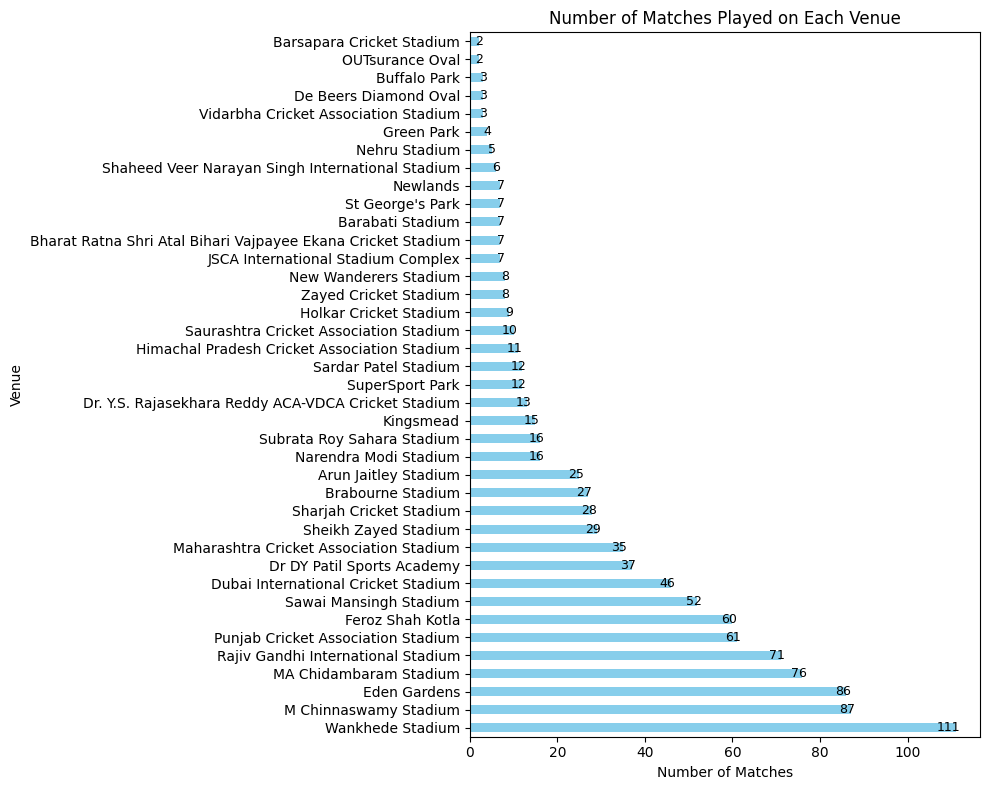

In [31]:

# Count the number of matches played on each venue
venue_match_count = ipl3['Venue'].value_counts()

# Plot the count of matches played on each venue
plt.figure(figsize=(10, 8))
venue_match_count.plot(kind='barh', color='skyblue')
plt.title('Number of Matches Played on Each Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.tight_layout()

# Annotate each bar with its count
for i, count in enumerate(venue_match_count):
    plt.text(count + 1, i, str(count), ha='right', va='center', fontsize=9)

plt.show()


## match winning by toss decision at each venue

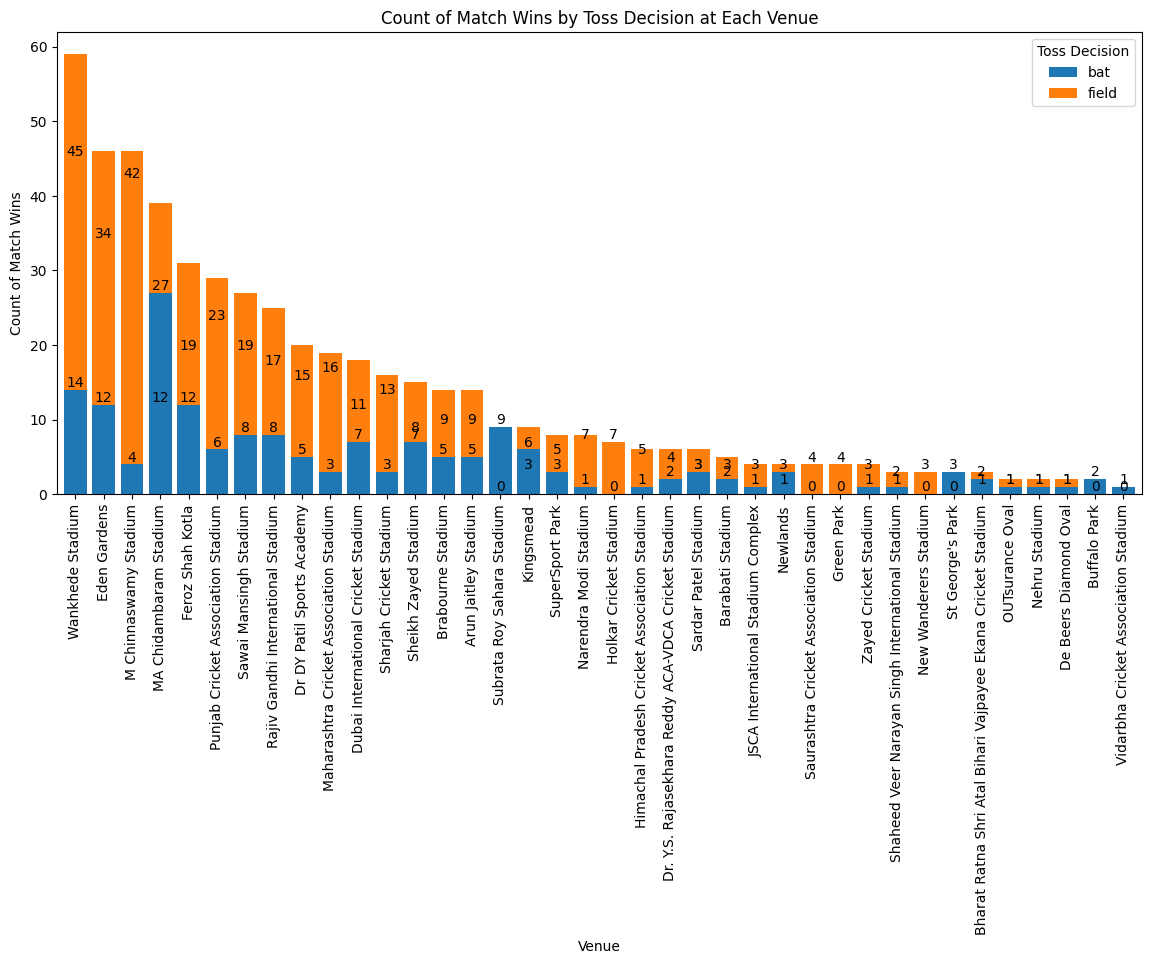

In [34]:
# Filter the DataFrame to include only matches where the winning team decided to bat or bowl after winning the toss
winning_toss_decision = ipl3[ipl3['TossWinner'] == ipl3['WinningTeam']]

# Group by 'Venue' and 'TossDecision' and count the occurrences
winning_toss_decision_counts = winning_toss_decision.groupby(['Venue', 'TossDecision']).size().unstack(fill_value=0)

# Sort the DataFrame by the total count of match wins for each venue
winning_toss_decision_counts['Total'] = winning_toss_decision_counts.sum(axis=1)
winning_toss_decision_counts = winning_toss_decision_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting
ax = winning_toss_decision_counts.plot(kind='bar', stacked=True, figsize=(14, 6), width=0.8)  # Adjust width of bars
plt.title('Count of Match Wins by Toss Decision at Each Venue')
plt.xlabel('Venue')
plt.ylabel('Count of Match Wins')
plt.legend(title='Toss Decision')
plt.xticks(rotation=90)

# Adding counts on the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


## Average runs on each venue

In [75]:
# Extracting columns 22 to 37
inning_columns = ipl3.columns[16:,]

# Grouping by 'Venue' and calculating the mean for the specified columns
venue_avg_innings_scores = ipl3.groupby('Venue')[inning_columns].mean()
venue_avg_innings_scores_rounded = venue_avg_innings_scores.round(0)
sorted_df = venue_avg_innings_scores_rounded.sort_values(by=['Total Runs 1st Innings'], ascending=False)
sorted_df

,Total Runs 1st Innings,Total Runs 2nd Innings,Total Wickets 1st Innings,Total Wickets 2nd Innings,Power Play Runs 1st Innings,Middle Overs Runs 1st Innings,Death Overs Runs 1st Innings,Power Play Runs 2nd Innings,Middle Overs Runs 2nd Innings,Death Overs Runs 2nd Innings,Power Play Wickets 1st Innings,Middle Overs Wickets 1st Innings,Death Overs Wickets 1st Innings,Power Play Wickets 2nd Innings,Middle Overs Wickets 2nd Innings,Death Overs Wickets 2nd Innings
Venue,,,,,,,,,,,,,,,,
Barsapara Cricket Stadium,198.0,167.0,4.0,8.0,74.0,78.0,47.0,52.0,71.0,44.0,0.0,3.0,2.0,3.0,3.0,2.0
Himachal Pradesh Cricket Association Stadium,180.0,155.0,5.0,7.0,49.0,82.0,49.0,53.0,71.0,32.0,1.0,1.0,2.0,2.0,3.0,2.0
Brabourne Stadium,178.0,166.0,6.0,6.0,61.0,74.0,43.0,58.0,74.0,34.0,1.0,2.0,2.0,2.0,3.0,2.0
Narendra Modi Stadium,177.0,161.0,6.0,6.0,57.0,75.0,45.0,57.0,76.0,28.0,2.0,2.0,2.0,2.0,3.0,1.0
Arun Jaitley Stadium,175.0,161.0,6.0,6.0,54.0,76.0,45.0,63.0,71.0,26.0,2.0,2.0,2.0,1.0,3.0,2.0
M Chinnaswamy Stadium,171.0,151.0,6.0,5.0,52.0,76.0,43.0,53.0,70.0,28.0,2.0,2.0,2.0,2.0,2.0,1.0
Wankhede Stadium,169.0,159.0,6.0,6.0,51.0,75.0,43.0,55.0,74.0,31.0,2.0,2.0,2.0,2.0,3.0,2.0
Saurashtra Cricket Association Stadium,169.0,163.0,6.0,4.0,58.0,70.0,41.0,68.0,70.0,24.0,1.0,2.0,2.0,1.0,2.0,1.0
Punjab Cricket Association Stadium,168.0,157.0,6.0,5.0,56.0,73.0,40.0,57.0,72.0,29.0,1.0,2.0,2.0,2.0,2.0,2.0


In [76]:
# Group data by venue and calculate the minimum first innings score for each venue
venue_min_score = ipl3.groupby('Venue')['Total Runs 1st Innings'].min()

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Venue', 'Min Score for 95% Probability of Winning'])

# Determine the minimum first innings score for a 95% probability of winning for each venue
for venue, min_score in venue_min_score.items():
    # Filter data for the venue and minimum score
    venue_data = ipl3[(ipl3['Venue'] == venue) & (ipl3['Total Runs 1st Innings'] >= min_score)]
    
    # Calculate the winning probability based on the team batting first
    total_matches = len(venue_data)
    toss_winner = venue_data['TossWinner']
    toss_decision = venue_data['TossDecision']
    bat_first_team = toss_winner.where(toss_decision == 'bat', venue_data['Team2'])
    win_count = len(venue_data[venue_data['WinningTeam'] == bat_first_team])
    
    # Handle division by zero
    if total_matches == 0:
        win_prob = 0
    else:
        win_prob = win_count / total_matches
    
    # Iterate through scores to find the minimum score for 95% probability of winning
    min_score_95 = min_score
    while win_prob < 0.95 and total_matches > 0:  # Check total_matches > 0 to prevent division by zero
        min_score_95 += 1
        venue_data = ipl3[(ipl3['Venue'] == venue) & (ipl3['Total Runs 1st Innings'] >= min_score_95)]
        total_matches = len(venue_data)
        toss_winner = venue_data['TossWinner']
        toss_decision = venue_data['TossDecision']
        bat_first_team = toss_winner.where(toss_decision == 'bat', venue_data['Team2'])
        win_count = len(venue_data[venue_data['WinningTeam'] == bat_first_team])
        
        # Handle division by zero
        if total_matches == 0:
            win_prob = 0
        else:
            win_prob = win_count / total_matches
    
    # Append the result to the DataFrame
    result_df = pd.concat([result_df, pd.DataFrame([{'Venue': venue, 'Min Score for 95% Probability of Winning': min_score_95}])], ignore_index=True)

print("Minimum First Innings Score for 95% Probability of Winning at Each Venue:")
result_df


Minimum First Innings Score for 95% Probability of Winning at Each Venue:


,Venue,Min Score for 95% Probability of Winning
0,Arun Jaitley Stadium,221
1,Barabati Stadium,232
2,Barsapara Cricket Stadium,200
3,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,194
4,Brabourne Stadium,218
5,Buffalo Park,117
6,De Beers Diamond Oval,141
7,Dr DY Patil Sports Academy,217
8,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,207
9,Dubai International Cricket Stadium,220


In [77]:
from scipy.stats import chi2_contingency
import pandas as pd

# Assuming ipl3 is your DataFrame containing the data

# Count of toss-winning teams choosing to bat and their corresponding wins and losses
bat_decisions = ipl3[ipl3['TossDecision'] == 'bat']
bat_win_count = len(bat_decisions[bat_decisions['WinningTeam'] == bat_decisions['TossWinner']])
bat_loss_count = len(bat_decisions) - bat_win_count

# Count of toss-winning teams choosing to field and their corresponding wins and losses
field_decisions = ipl3[ipl3['TossDecision'] == 'field']
field_win_count = len(field_decisions[field_decisions['WinningTeam'] == field_decisions['TossWinner']])
field_loss_count = len(field_decisions) - field_win_count

# Create a contingency table
contingency_table = pd.DataFrame({
    'Decision': ['Bat', 'Field'],
    'Wins': [bat_win_count, field_win_count],
    'Losses': [bat_loss_count, field_loss_count]
})

# Perform chi-square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table[['Wins', 'Losses']])

# Print test results
print("Chi-Square Test Results:")
print("Chi-Square Statistic:", chi2_statistic)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)
print("Expected Frequencies Table:")
print(expected)

# Interpret results
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject null hypothesis: There is a significant association between toss decision and match outcome."
else:
    conclusion = "Fail to reject null hypothesis: There is no significant association between toss decision and match outcome."

# Print contingency table
print("\nContingency Table:")
print(contingency_table)

# Null and Alternative Hypotheses
null_hypothesis = "H0: There is no association between toss decision and match outcome."
alternative_hypothesis = "H1: There is an association between toss decision and match outcome."

# Test statistic formula
test_statistic_formula = "Chi-Square Statistic = Sum((Observed - Expected)^2 / Expected)"

# Build the report
report = f"""
Chi-Square Test for Independence

Null Hypothesis (H0):
{null_hypothesis}

Alternative Hypothesis (H1):
{alternative_hypothesis}

Test Statistic Formula:
{test_statistic_formula}

Results:
Chi-Square Statistic: {chi2_statistic:.4f}
Degrees of Freedom: {dof}
p-value: {p_value:.4f}

Interpretation:
{conclusion}

Contingency Table:
{contingency_table}

Expected Frequencies Table:
{pd.DataFrame(expected, index=['Bat', 'Field'], columns=['Wins', 'Losses'])}
"""

print(report)


Chi-Square Test Results:
Chi-Square Statistic: 6.421923512904122
Degrees of Freedom: 1
p-value: 0.011272000620032089
Expected Frequencies Table:
[[189.99609375 182.00390625]
 [333.00390625 318.99609375]]

Contingency Table:
  Decision  Wins  Losses
0      Bat   170     202
1    Field   353     299

Chi-Square Test for Independence

Null Hypothesis (H0):
H0: There is no association between toss decision and match outcome.

Alternative Hypothesis (H1):
H1: There is an association between toss decision and match outcome.

Test Statistic Formula:
Chi-Square Statistic = Sum((Observed - Expected)^2 / Expected)

Results:
Chi-Square Statistic: 6.4219
Degrees of Freedom: 1
p-value: 0.0113

Interpretation:
Reject null hypothesis: There is a significant association between toss decision and match outcome.

Contingency Table:
  Decision  Wins  Losses
0      Bat   170     202
1    Field   353     299

Expected Frequencies Table:
             Wins      Losses
Bat    189.996094  182.003906
Field  333

In [78]:
from scipy import stats

# Perform normality tests for each variable
normality_tests = {}
for column in ipl3.iloc[:, -16:]:
    ad_stat, ad_crit_values, ad_sig_levels = stats.anderson(ipl3[column], dist='norm')
    
    # Check if p-values are less than 0.05 (significance level)
    is_normal = ad_stat < ad_crit_values[2]
    normality_tests[column] = {
        "Anderson-Darling statistic": round(ad_stat, 4),
        "Anderson-Darling critical values": round(ad_crit_values[2], 4),
        "Is Normally Distributed": is_normal
    }

# Create DataFrame to display results
results_df = pd.DataFrame.from_dict(normality_tests, orient='index')

# Display results
print("Normality Test Results:")
df2=results_df.rename(columns={'index': 'Variables'})
df2

Normality Test Results:


,Anderson-Darling statistic,Anderson-Darling critical values,Is Normally Distributed
Total Runs 1st Innings,0.7455,0.784,True
Total Runs 2nd Innings,3.8773,0.784,False
Total Wickets 1st Innings,11.9713,0.784,False
Total Wickets 2nd Innings,12.6761,0.784,False
Power Play Runs 1st Innings,0.9072,0.784,False
Middle Overs Runs 1st Innings,1.6005,0.784,False
Death Overs Runs 1st Innings,2.6230,0.784,False
Power Play Runs 2nd Innings,1.2496,0.784,False
Middle Overs Runs 2nd Innings,5.5502,0.784,False
Death Overs Runs 2nd Innings,8.5553,0.784,False


In [79]:
# Get the current working directory
current_directory = os.getcwd()

# Define the file name
file_name = "Normality test.csv"

# Save the DataFrame to a CSV file in the current directory
results_df.to_csv(os.path.join(current_directory, file_name), index=False)

# Now, the DataFrame 'merged_data2_sorted' is saved as a CSV file in the current working directory


## Wilcoxon signed-rank test

In [80]:
from scipy.stats import wilcoxon
import pandas as pd

# Assuming ipl3 is your DataFrame containing the data

# Selecting total runs and wickets columns for 1st and 2nd innings
runs_1st_innings = ipl3['Total Runs 1st Innings']
runs_2nd_innings = ipl3['Total Runs 2nd Innings']
wickets_1st_innings = ipl3['Total Wickets 1st Innings']
wickets_2nd_innings = ipl3['Total Wickets 2nd Innings']

# Perform Wilcoxon signed-rank test for total runs
runs_statistic, runs_p_value = wilcoxon(runs_1st_innings, runs_2nd_innings)

# Perform Wilcoxon signed-rank test for total wickets
wickets_statistic, wickets_p_value = wilcoxon(wickets_1st_innings, wickets_2nd_innings)

# Print results
print("Wilcoxon Signed-Rank Test Results:")
print("Total Runs:")
print("Statistic:", runs_statistic)
print("P-value:", runs_p_value)
print("Significant difference" if runs_p_value < 0.05 else "No significant difference")

print("\nTotal Wickets:")
print("Statistic:", wickets_statistic)
print("P-value:", wickets_p_value)
print("Significant difference" if wickets_p_value < 0.05 else "No significant difference")

# Null and Alternative Hypotheses
null_hypothesis_runs = "H0: There is no difference in total runs scored between 1st and 2nd innings."
alternative_hypothesis_runs = "H1: There is a difference in total runs scored between 1st and 2nd innings."
null_hypothesis_wickets = "H0: There is no difference in total wickets taken between 1st and 2nd innings."
alternative_hypothesis_wickets = "H1: There is a difference in total wickets taken between 1st and 2nd innings."

# Test statistic formula
test_statistic_formula_runs = "Wilcoxon Statistic = Sum of ranks of differences between paired observations."
test_statistic_formula_wickets = "Wilcoxon Statistic = Sum of ranks of differences between paired observations."

# Build the report
report = f"""
Wilcoxon Signed-Rank Test Results:

Total Runs:
Null Hypothesis (H0):
{null_hypothesis_runs}

Alternative Hypothesis (H1):
{alternative_hypothesis_runs}

Test Statistic Formula:
{test_statistic_formula_runs}

Results:
Statistic: {runs_statistic:.4f}
P-value: {runs_p_value:.4f}

Interpretation:
{"Reject null hypothesis: There is a significant difference in total runs scored between 1st and 2nd innings." if runs_p_value < 0.05 else "Fail to reject null hypothesis: There is no significant difference in total runs scored between 1st and 2nd innings."}

Total Wickets:
Null Hypothesis (H0):
{null_hypothesis_wickets}

Alternative Hypothesis (H1):
{alternative_hypothesis_wickets}

Test Statistic Formula:
{test_statistic_formula_wickets}

Results:
Statistic: {wickets_statistic:.4f}
P-value: {wickets_p_value:.4f}

Interpretation:
{"Reject null hypothesis: There is a significant difference in total wickets taken between 1st and 2nd innings." if wickets_p_value < 0.05 else "Fail to reject null hypothesis: There is no significant difference in total wickets taken between 1st and 2nd innings."}
"""

print(report)


Wilcoxon Signed-Rank Test Results:
Total Runs:
Statistic: 154151.0
P-value: 8.513353071057916e-28
Significant difference

Total Wickets:
Statistic: 190510.0
P-value: 0.002118246158876684
Significant difference

Wilcoxon Signed-Rank Test Results:

Total Runs:
Null Hypothesis (H0):
H0: There is no difference in total runs scored between 1st and 2nd innings.

Alternative Hypothesis (H1):
H1: There is a difference in total runs scored between 1st and 2nd innings.

Test Statistic Formula:
Wilcoxon Statistic = Sum of ranks of differences between paired observations.

Results:
Statistic: 154151.0000
P-value: 0.0000

Interpretation:
Reject null hypothesis: There is a significant difference in total runs scored between 1st and 2nd innings.

Total Wickets:
Null Hypothesis (H0):
H0: There is no difference in total wickets taken between 1st and 2nd innings.

Alternative Hypothesis (H1):
H1: There is a difference in total wickets taken between 1st and 2nd innings.

Test Statistic Formula:
Wilcoxon 

In [83]:
from scipy.stats import levene

# Assuming 'ipl' is your DataFrame containing the data
# Selecting columns for runs and wickets for each phase (Power Play, Middle Overs, Death Overs)
power_play_runs_1st = ipl3['Power Play Runs 1st Innings']
middle_overs_runs_1st = ipl3['Middle Overs Runs 1st Innings']
death_overs_runs_1st = ipl3['Death Overs Runs 1st Innings']
power_play_runs_2nd = ipl3['Power Play Runs 2nd Innings']
middle_overs_runs_2nd = ipl3['Middle Overs Runs 2nd Innings']
death_overs_runs_2nd = ipl3['Death Overs Runs 2nd Innings']
power_play_wickets_1st = ipl3['Power Play Wickets 1st Innings']
middle_overs_wickets_1st = ipl3['Middle Overs Wickets 1st Innings']
death_overs_wickets_1st = ipl3['Death Overs Wickets 1st Innings']
power_play_wickets_2nd = ipl3['Power Play Wickets 2nd Innings']
middle_overs_wickets_2nd = ipl3['Middle Overs Wickets 2nd Innings']
death_overs_wickets_2nd = ipl3['Death Overs Wickets 2nd Innings']

# Perform Levene's test for equal variances for runs
statistic_runs_1st, p_value_runs_1st = levene(power_play_runs_1st, middle_overs_runs_1st, death_overs_runs_1st)
statistic_runs_2nd, p_value_runs_2nd = levene(power_play_runs_2nd, middle_overs_runs_2nd, death_overs_runs_2nd)

# Perform Levene's test for equal variances for wickets
statistic_wickets_1st, p_value_wickets_1st = levene(power_play_wickets_1st, middle_overs_wickets_1st, death_overs_wickets_1st)
statistic_wickets_2nd, p_value_wickets_2nd = levene(power_play_wickets_2nd, middle_overs_wickets_2nd, death_overs_wickets_2nd)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Variable': ['Runs 1st Innings', 'Runs 2nd Innings', 'Wickets 1st Innings', 'Wickets 2nd Innings'],
    'Statistic': [statistic_runs_1st, statistic_runs_2nd, statistic_wickets_1st, statistic_wickets_2nd],
    'P-value': [p_value_runs_1st, p_value_runs_2nd, p_value_wickets_1st, p_value_wickets_2nd],
    'Equal Variances': ['Yes' if p_value_runs_1st > 0.05 else 'No',
                        'Yes' if p_value_runs_2nd > 0.05 else 'No',
                        'Yes' if p_value_wickets_1st > 0.05 else 'No',
                        'Yes' if p_value_wickets_2nd > 0.05 else 'No']
})

# Print the results table
print("Levene's Test Results:")
results

Levene's Test Results:


,Variable,Statistic,P-value,Equal Variances
0,Runs 1st Innings,46.822087,9.321592e-21,No
1,Runs 2nd Innings,27.811301,1.071160e-12,No
2,Wickets 1st Innings,12.345714,4.568545e-06,No
3,Wickets 2nd Innings,17.983623,1.718791e-08,No


In [84]:
# Get the current working directory
current_directory = os.getcwd()

# Define the file name
file_name = "Eqaulity of variances.csv"

# Save the DataFrame to a CSV file in the current directory
results.to_csv(os.path.join(current_directory, file_name), index=False)

# Now, the DataFrame 'merged_data2_sorted' is saved as a CSV file in the current working directory


In [85]:
from scipy.stats import kruskal

# Selecting columns for runs and wickets for each phase (Power Play, Middle Overs, Death Overs)
power_play_runs_1st = ipl3['Power Play Runs 1st Innings']
middle_overs_runs_1st = ipl3['Middle Overs Runs 1st Innings']
death_overs_runs_1st = ipl3['Death Overs Runs 1st Innings']
power_play_runs_2nd = ipl3['Power Play Runs 2nd Innings']
middle_overs_runs_2nd = ipl3['Middle Overs Runs 2nd Innings']
death_overs_runs_2nd = ipl3['Death Overs Runs 2nd Innings']
power_play_wickets_1st = ipl3['Power Play Wickets 1st Innings']
middle_overs_wickets_1st = ipl3['Middle Overs Wickets 1st Innings']
death_overs_wickets_1st = ipl3['Death Overs Wickets 1st Innings']
power_play_wickets_2nd = ipl3['Power Play Wickets 2nd Innings']
middle_overs_wickets_2nd = ipl3['Middle Overs Wickets 2nd Innings']
death_overs_wickets_2nd = ipl3['Death Overs Wickets 2nd Innings']

# Perform Kruskal-Wallis test for runs
runs_statistic_1st, runs_p_value_1st = kruskal(power_play_runs_1st, middle_overs_runs_1st, death_overs_runs_1st)
runs_statistic_2nd, runs_p_value_2nd = kruskal(power_play_runs_2nd, middle_overs_runs_2nd, death_overs_runs_2nd)

# Perform Kruskal-Wallis test for wickets
wickets_statistic_1st, wickets_p_value_1st = kruskal(power_play_wickets_1st, middle_overs_wickets_1st, death_overs_wickets_1st)
wickets_statistic_2nd, wickets_p_value_2nd = kruskal(power_play_wickets_2nd, middle_overs_wickets_2nd, death_overs_wickets_2nd)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Variable': ['Runs 1st Innings', 'Runs 2nd Innings', 'Wickets 1st Innings', 'Wickets 2nd Innings'],
    'Statistic': [runs_statistic_1st, runs_statistic_2nd, wickets_statistic_1st, wickets_statistic_2nd],
    'P-value': [runs_p_value_1st, runs_p_value_2nd, wickets_p_value_1st, wickets_p_value_2nd]
})

# Hypothesis Testing
significance_level = 0.05
for index, row in results.iterrows():
    variable = row['Variable']
    p_value = row['P-value']
    print(f"\nHypothesis Testing for {variable}:")
    if p_value < significance_level:
        print("Reject the null hypothesis. There is sufficient evidence to conclude that at least one group has a different population median.")
    else:
        print("Fail to reject the null hypothesis. There is not enough evidence to conclude that there is a difference in population medians among the groups.")

# Print the results table
print("Kruskal-Wallis Test Results:")
results  


Hypothesis Testing for Runs 1st Innings:
Reject the null hypothesis. There is sufficient evidence to conclude that at least one group has a different population median.

Hypothesis Testing for Runs 2nd Innings:
Reject the null hypothesis. There is sufficient evidence to conclude that at least one group has a different population median.

Hypothesis Testing for Wickets 1st Innings:
Reject the null hypothesis. There is sufficient evidence to conclude that at least one group has a different population median.

Hypothesis Testing for Wickets 2nd Innings:
Reject the null hypothesis. There is sufficient evidence to conclude that at least one group has a different population median.
Kruskal-Wallis Test Results:


,Variable,Statistic,P-value
0,Runs 1st Innings,1330.330150,1.325801e-289
1,Runs 2nd Innings,1689.347264,0.000000e+00
2,Wickets 1st Innings,200.435251,2.992528e-44
3,Wickets 2nd Innings,232.553396,3.174473e-51


In [86]:
# Get the current working directory
current_directory = os.getcwd()

# Define the file name
file_name = "Kruskal-Wallis Results.csv"

# Save the DataFrame to a CSV file in the current directory
results.to_csv(os.path.join(current_directory, file_name), index=False)

# Now, the DataFrame 'merged_data2_sorted' is saved as a CSV file in the current working directory
